In [1]:

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from math import sqrt

### Датасет `sp500_stocks.csv`

In [3]:
stocks_df = pd.read_csv('../data/market_data/sp500/sp500_stocks.csv')
pivoted_stocks_df = stocks_df.pivot(
    index='Date', columns='Symbol', values='Adj Close')

pivoted_stocks_df.head()

Symbol,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.122225,4.496877,6.470740,NaN,NaN,18.952158,7.994444,32.212463,37.090000,22.530378,...,52.883564,9.905467,41.538414,12.918812,40.237793,NaN,19.158094,52.587063,28.670000,NaN
2010-01-05,19.903641,5.005957,6.481928,NaN,NaN,18.799044,7.967778,32.411537,37.700001,22.494806,...,52.765034,10.115746,44.064743,12.765594,40.394901,NaN,19.092577,54.251747,28.620001,NaN
2010-01-06,19.832933,4.798555,6.378825,NaN,NaN,18.903440,7.933333,32.756092,37.619999,22.452118,...,53.614510,10.003899,43.486748,12.790112,40.744026,NaN,18.956091,54.234219,28.400000,NaN
2010-01-07,19.807213,4.939965,6.367032,NaN,NaN,19.060040,7.886667,32.725479,36.889999,22.274269,...,53.456459,9.959159,44.415436,12.734958,40.616020,NaN,18.950630,55.478359,27.690001,NaN
2010-01-08,19.800785,4.845691,6.409362,NaN,NaN,19.157482,7.871111,32.595295,36.689999,22.402325,...,53.397198,9.867442,44.097221,12.741084,40.453075,NaN,18.956091,54.313084,27.600000,NaN


### Visualizing the Dataset

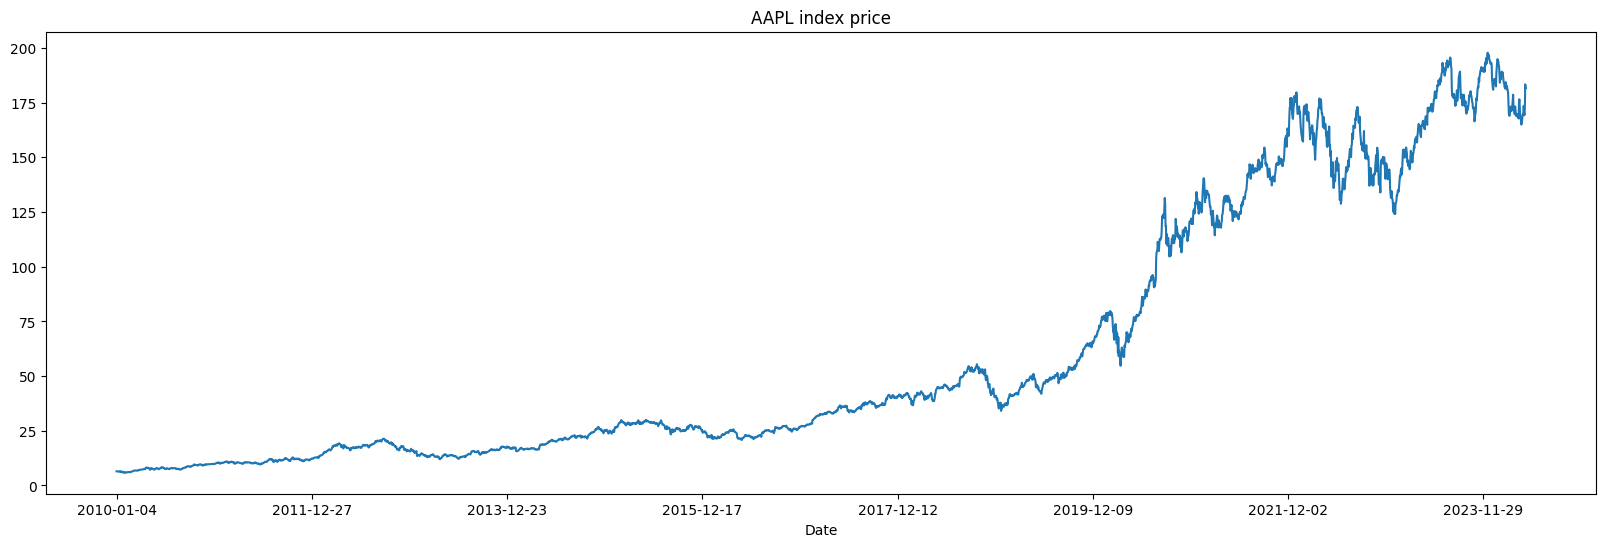

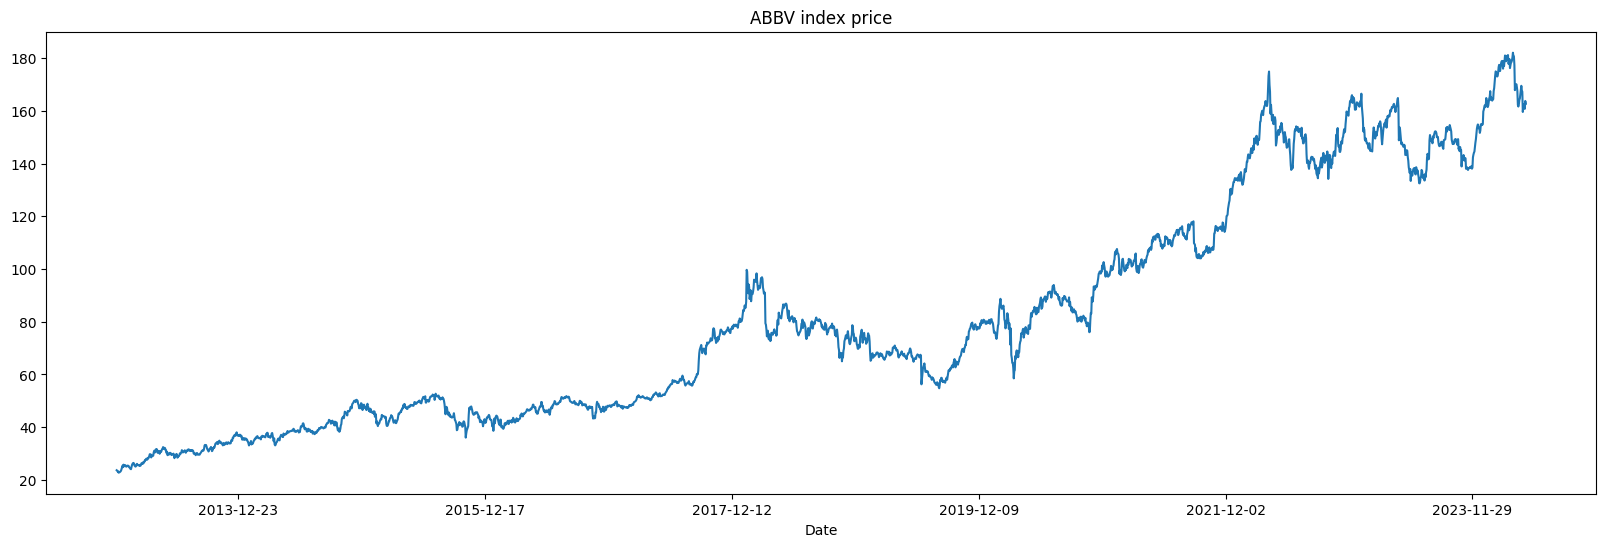

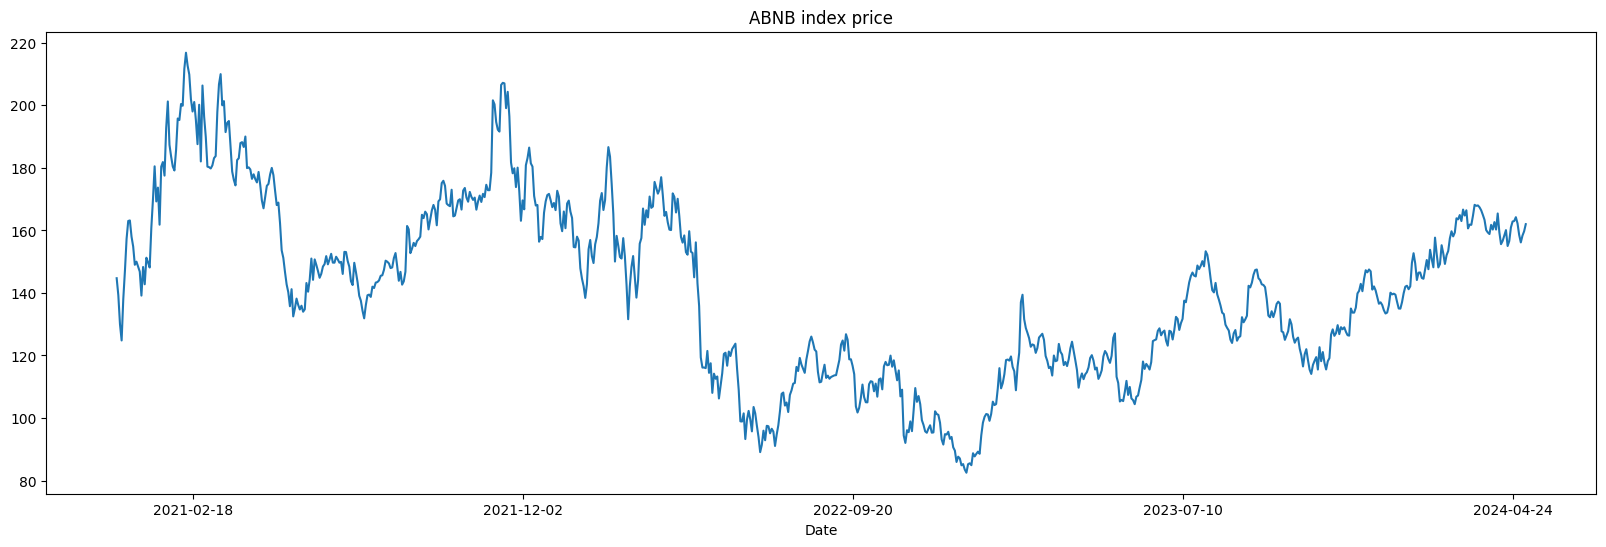

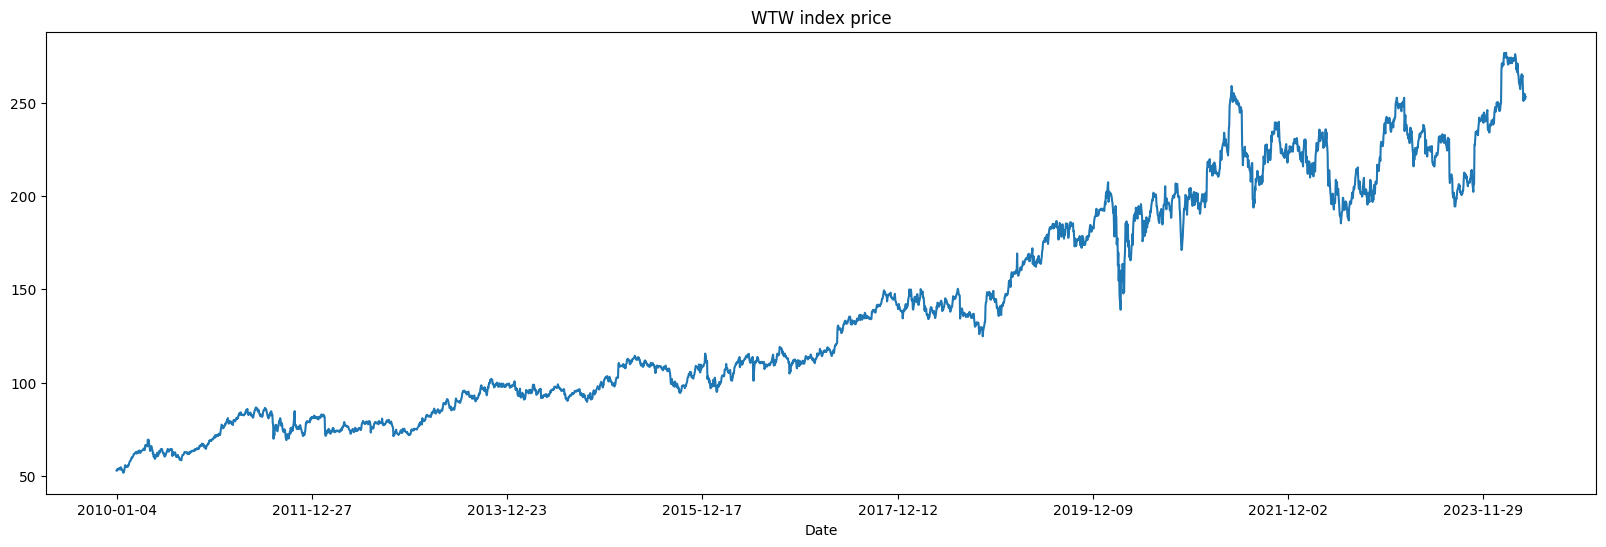

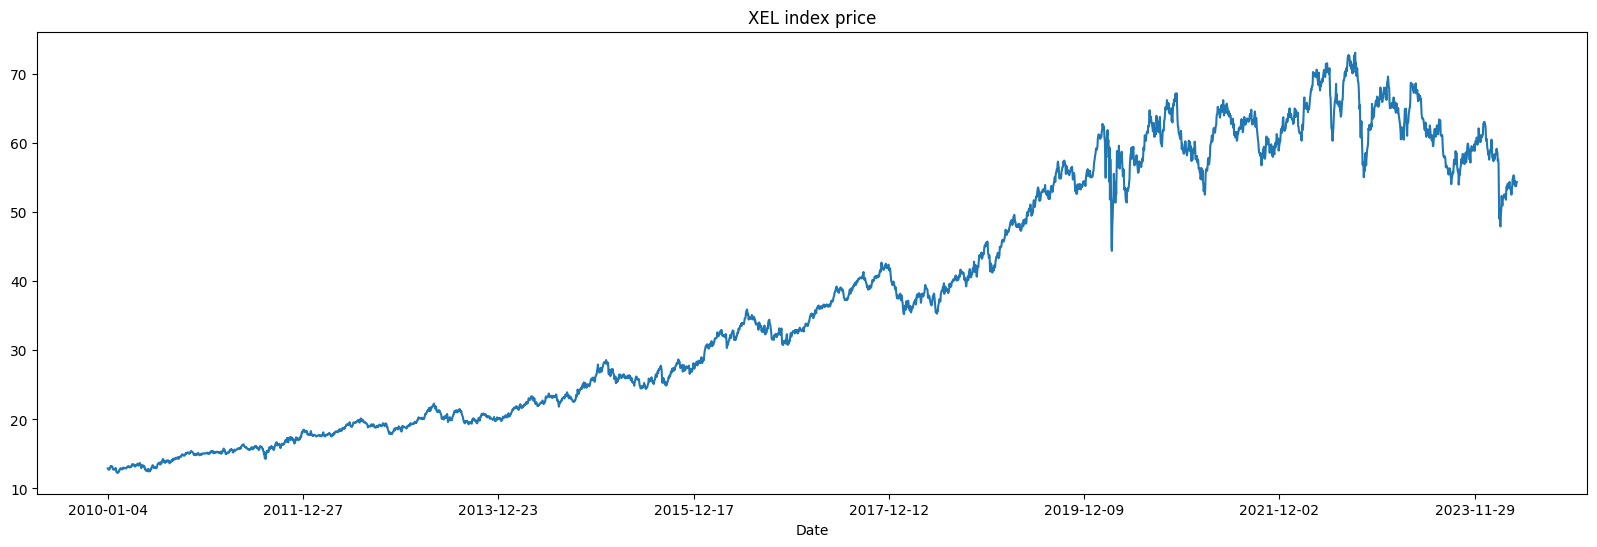

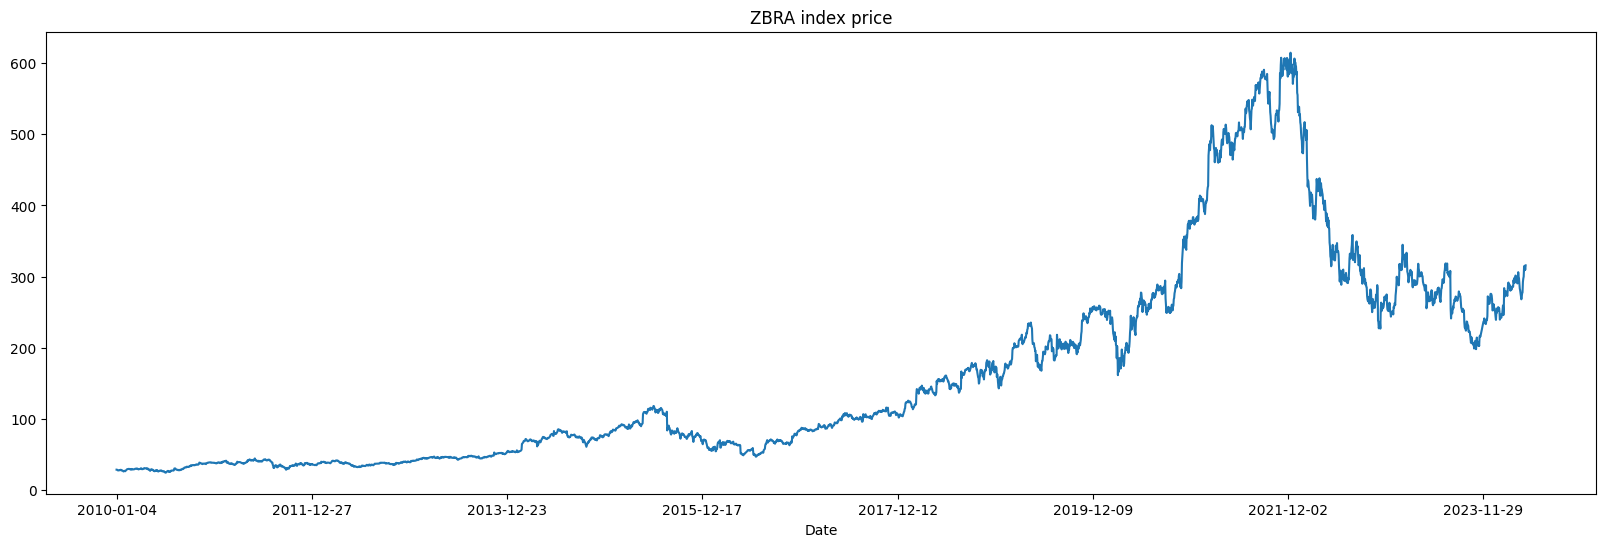

In [4]:
for index in ['AAPL', 'ABBV', 'ABNB', 'WTW', 'XEL', 'ZBRA']:
	plt.figure(figsize=(20, 6))
	plt.title(f'{index} index price')
	series = pivoted_stocks_df[index]
	series.plot()
	plt.show()

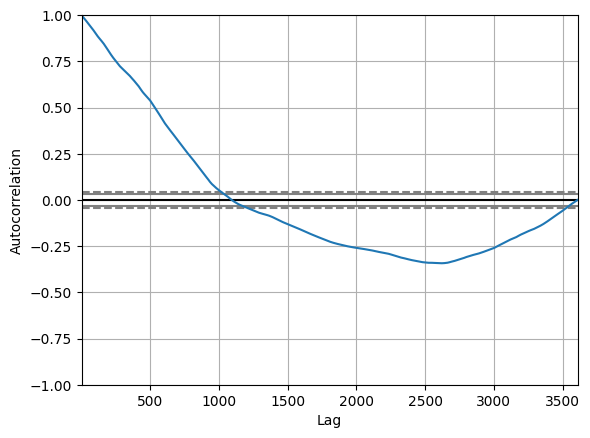

In [5]:
AAPL_prices = pivoted_stocks_df['AAPL']
autocorrelation_plot(AAPL_prices)
plt.show()

### Building an ARIMA Model

In [6]:
AAPL_prices = AAPL_prices.reset_index()
AAPL_prices['Date'] = pd.to_datetime(AAPL_prices['Date']).dt.to_period('M')
AAPL_prices = AAPL_prices.set_index('Date')

/Users/daniel/Desktop/Projects/DS/fama-franch-models/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/daniel/Desktop/Projects/DS/fama-franch-models/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/daniel/Desktop/Projects/DS/fama-franch-models/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   ZBRA   No. Observations:                 3609
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10897.343
Date:                Thu, 09 May 2024   AIC                          21806.686
Time:                        19:35:03   BIC                          21843.832
Sample:                             0   HQIC                         21819.923
                               - 3609                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0225      0.009     -2.521      0.012      -0.040      -0.005
ar.L2          0.0067      0.009      0.743      0.457      -0.011       0.024
ar.L3          0.0322      0.010      3.116      0.0

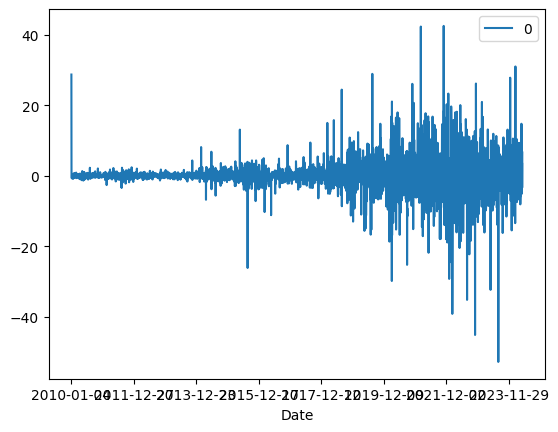

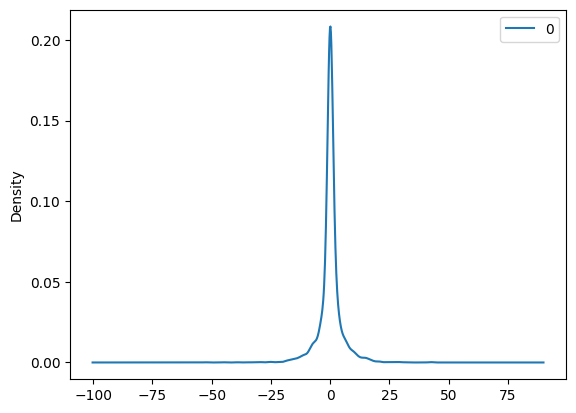

In [7]:



# AAPL_prices.index = AAPL_prices.index.to_period('M')

# if not isinstance(AAPL_prices.index, pd.PeriodIndex):
#     AAPL_prices.index = pd.PeriodIndex(AAPL_prices.index)

# fit model
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

/var/folders/tx/p7gzqzw55zl3kjt1p0dk8psc0000gn/T/ipykernel_96492/3340380162.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=147.207674, expected=143.235596
predicted=143.393071, expected=140.206421
predicted=140.681768, expected=147.019562
predicted=146.799269, expected=147.297684
predicted=146.959633, expected=146.801086
predicted=146.379301, expected=145.629135
predicted=145.627071, expected=141.934540
predicted=142.603160, expected=139.977982
predicted=140.249695, expected=141.676300
predicted=141.706423, expected=141.189667
predicted=141.134105, expected=143.503754
predicted=143.113423, expected=144.477066
predicted=144.272454, expected=142.232498
predicted=142.358354, expected=135.568283
predicted=135.988432, expected=133.591858
predicted=134.102942, expected=131.466476
predicted=131.889860, expected=131.396957
predicted=131.373929, expected=134.525436
predicted=134.095035, expected=131.327423
predicted=131.314477, expected=130.959961
predicted=130.861500, expected=129.142456
predicted=129.364024, expected=125.179680
predicted=125.621402, expected=128.725311
predicted=128.517194, expected=129

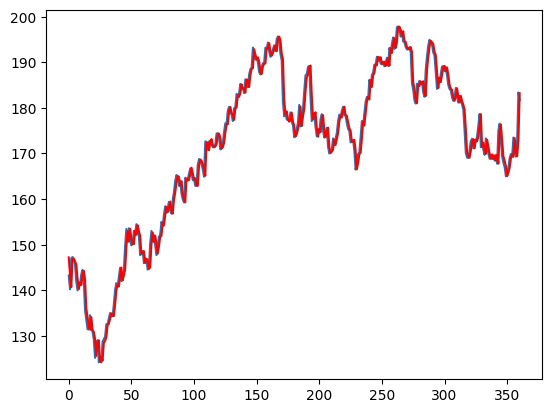

In [8]:
AAPL_prices = pivoted_stocks_df['AAPL']
AAPL_prices = AAPL_prices.reset_index()
AAPL_prices['Date'] = pd.to_datetime(AAPL_prices['Date']).dt.to_period('M')
AAPL_prices = AAPL_prices.set_index('Date')

# split into train and test sets
X = AAPL_prices.values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5, 1, 0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
 
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [9]:
r2_score(test, predictions)

0.9824602727956264

### Using auto-ARIMA

TODO